# **Clustering, Density Estimation, and Anomaly Detection**

Author: Dayne N. Fradejas 
---



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

**Data Set Information:**

This data set is populated by crawling TripAdvisor.com. Reviews on destinations in 10 categories mentioned across East Asia are considered. Each traveler rating is mapped as Excellent (4), Very Good (3), Average (2), Poor (1), and Terrible (0) and average rating is used against each category per user.

**Attribute Information:**
* Attribute 1 : Unique user id
* Attribute 2 : Average user feedback on art galleries
* Attribute 3 : Average user feedback on dance clubs
* Attribute 4 : Average user feedback on juice bars
* Attribute 5 : Average user feedback on restaurants
* Attribute 6 : Average user feedback on museums
* Attribute 7 : Average user feedback on resorts
* Attribute 8 : Average user feedback on parks/picnic spots
* Attribute 9 : Average user feedback on beaches
* Attribute 10 : Average user feedback on theaters
* Attribute 11 : Average user feedback on religious institutions

In [125]:
# read data from web
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00484/tripadvisor_review.csv")

# clean data with empty cells and cells with "?" and replace it with NaN
data = data.replace(r'^s*$', float('NaN'), regex = True)
data = data.replace("?", float('NaN'))

# drop rows with NaN values
data = data.dropna()

# output data
data

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...,...
975,User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,User 979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


In [126]:
# convert user id to number label
data['User ID'] = LabelEncoder().fit_transform(data['User ID'])

# prepare data
X = StandardScaler().fit_transform(data)

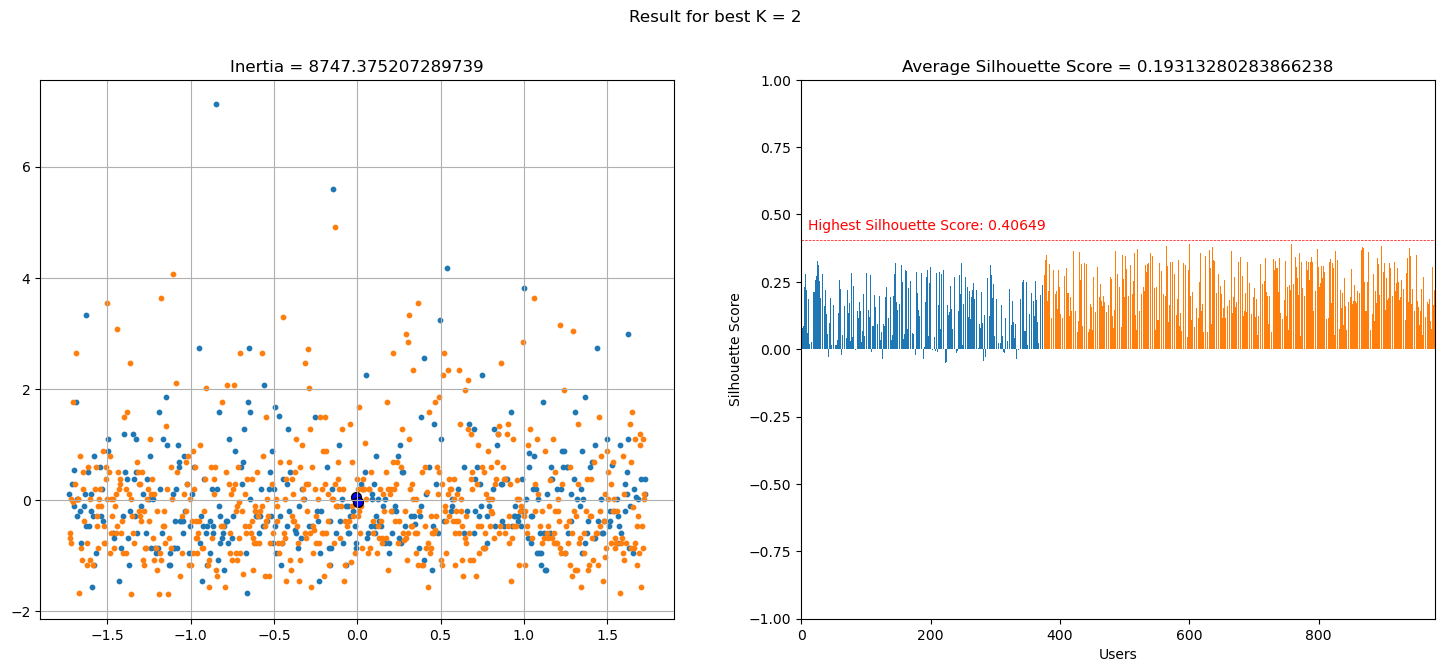

In [127]:
# look for the best value of K
silhouette_scores = []
for K in range(2, 11):
    kmeans = KMeans(n_clusters=K, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Find the best K based on the Silhouette Score
best_K = silhouette_scores.index(max(silhouette_scores)) + 2

# Set up the KMeans model
kmeans = KMeans(n_clusters=best_K, n_init=10)
kmeans.fit(X)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
silhouette_values = silhouette_samples(X, cluster_labels)
silhouette_avg = silhouette_score(X, cluster_labels)
max_silhouette_value = max(silhouette_values)

# Plot the KMeans results
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
fig.suptitle(f"Result for best K = {best_K}")

# plot the scatter plot for KMeans results
for i in range(0,best_K):
    ax1.scatter(X[cluster_labels == i,0], X[cluster_labels == i,1], s=10)
ax1.scatter(centroids[:,0],centroids[:,1], s=50, color='b', edgecolor='k')
ax1.set_title(f"Inertia = {inertia}")
ax1.grid()
sample = 0

# plot the bar graph for users 
for i in range(0,best_K):
    sil = silhouette_values[cluster_labels == i]
    ax2.bar(np.arange(sample,sample + sil.size),sil)
    sample = sample + sil.size

    
# Plot the Silhouette Scores as a bar plot with a red line for the best score
ax2.axis([0, len(X), -1, 1])
ax2.axhline(y=max_silhouette_value, color='red', linestyle='--', linewidth=0.5)
ax2.text(10, max_silhouette_value + 0.05, f'Highest Silhouette Score: {max_silhouette_value:.5f}', color='red', fontsize=10, ha='left', va='center')
ax2.set_xlabel('Users')
ax2.set_ylabel('Silhouette Score')
ax2.set_title(f"Average Silhouette Score = {silhouette_avg}")
plt.show()

## Reducing the Dataset to 2 Features using PCA

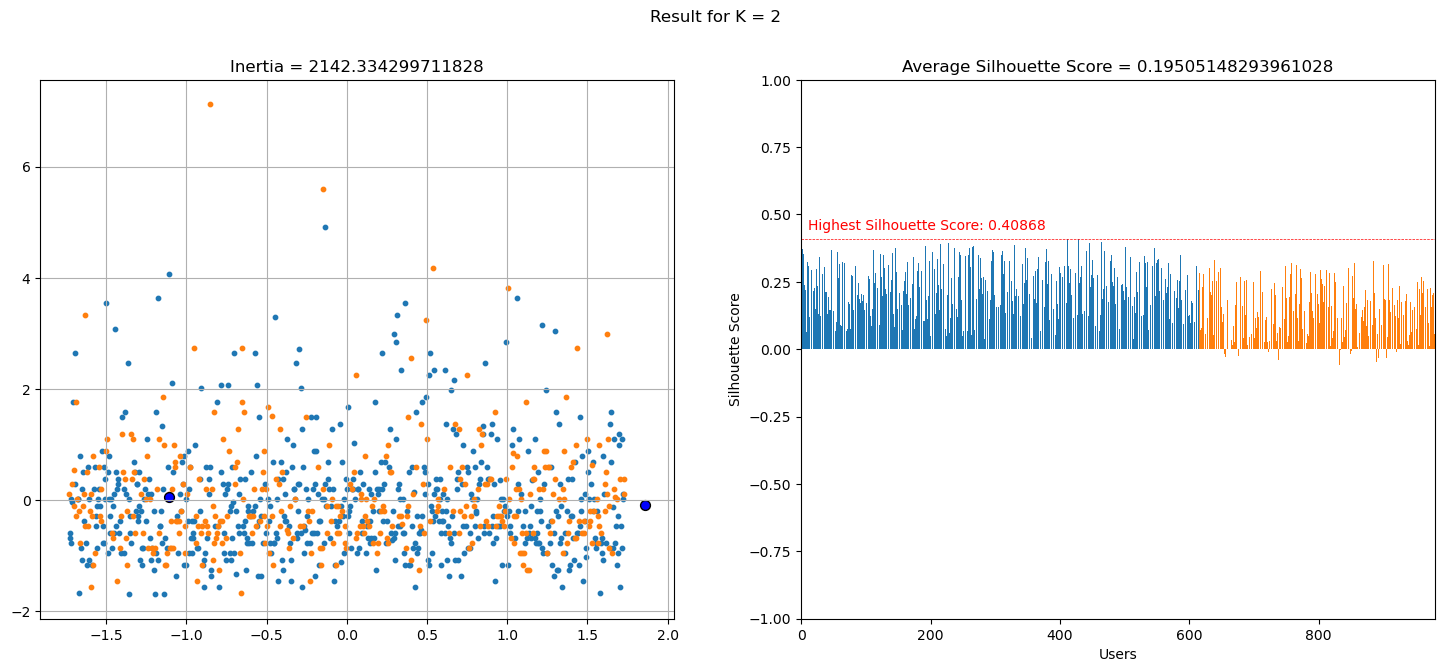

In [128]:
# look for the best value of K
silhouette_scores = []
for K in range(2, 11):
    # Create the pipeline
    pipe_kmeans = make_pipeline(
        PCA(n_components=2),  # Reduce dimensionality with PCA
        KMeans(n_clusters=K, n_init=10)  # Cluster the data with KMeans
    )
    labels = pipe_kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Find the best K based on the Silhouette Score
best_K = silhouette_scores.index(max(silhouette_scores)) + 2

# Set up the KMeans model
pipe_kmeans = make_pipeline(
    PCA(n_components=2),  # Reduce dimensionality with PCA
    KMeans(n_clusters=best_K, n_init=10, random_state = 45)  # Cluster the data with KMeans
    )

pipe_kmeans.fit(X)
cluster_labels = pipe_kmeans.named_steps['kmeans'].labels_
centroids = pipe_kmeans.named_steps['kmeans'].cluster_centers_
inertia = pipe_kmeans.named_steps['kmeans'].inertia_
silhouette_values = silhouette_samples(X, cluster_labels)
silhouette_avg = silhouette_score(X, cluster_labels)
max_silhouette_value = max(silhouette_values)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
fig.suptitle(f"Result for K = {best_K}")
for i in range(0,K):
    ax1.scatter(X[cluster_labels == i,0], X[cluster_labels == i,1], s=10)
ax1.scatter(centroids[:,0],centroids[:,1], s=50, color='b', edgecolor='k')
ax1.set_title(f"Inertia = {inertia}")
ax1.grid()
sample = 0

for i in range(0,best_K):
    sil = silhouette_values[cluster_labels == i]
    ax2.bar(np.arange(sample,sample + sil.size),sil)
    sample = sample + sil.size
    
ax2.axis([0, len(X), -1, 1])
ax2.axhline(y=max_silhouette_value, color='red', linestyle='--', linewidth=0.5)
ax2.text(10, max_silhouette_value + 0.05, f'Highest Silhouette Score: {max_silhouette_value:.5f}', color='red', fontsize=10, ha='left', va='center')
ax2.set_xlabel('Users')
ax2.set_ylabel('Silhouette Score')
ax2.set_title(f"Average Silhouette Score = {silhouette_avg}")
plt.show()

## Recover Original Data

In [129]:
# read data from web
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00484/tripadvisor_review.csv")

# clean data with empty cells and cells with "?" and replace it with NaN
data = data.replace(r'^s*$', float('NaN'), regex = True)
data = data.replace("?", float('NaN'))

# drop rows with NaN values
data = data.dropna()

# output data
data['User ID'] = LabelEncoder().fit_transform(data['User ID'])

## Detect for Anomalies using KernelDensity

Threshold (KDE) = 0.006928369040075613


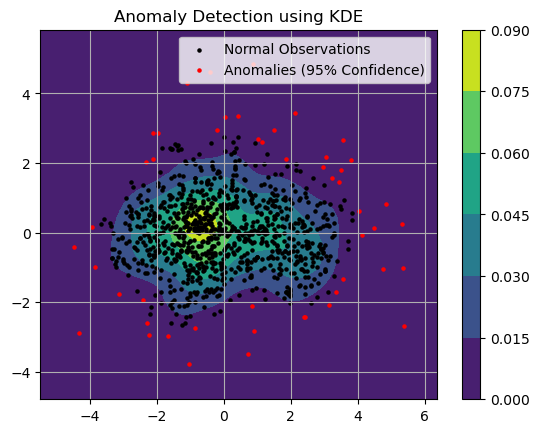

In [130]:
from sklearn.neighbors import KernelDensity

# Filter the data to only 2-feautures.
X = make_pipeline(StandardScaler(),
                  PCA(n_components=2)).fit_transform(data)

# Make a meshgrid for plotting surfaces
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

Xp, Yp = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
XY = np.vstack([Xp.ravel(), Yp.ravel()]).T

# Generate the KDE surface as Z
kde = KernelDensity(kernel='gaussian',bandwidth=0.4).fit(X)
Zp = np.exp(kde.score_samples(XY))
Zp = Zp.reshape(Xp.shape)

# Establish a confidence level of 95% (or 5% cutoff) 
# for the UCL using the quantile of kde_scores.
scores = kde.score_samples(X)
threshold = np.quantile(scores,0.05)
print(f"Threshold (KDE) = {np.exp(threshold)}")

# Get the anomalous data points
normals = X[scores > threshold,:]
anomals = X[scores <= threshold,:]

cntr = plt.contourf(Xp, Yp, Zp, cmap='viridis')
plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label='Anomalies (95% Confidence)')
plt.title('Anomaly Detection using KDE')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()


## Discussion of Results for Part 1
In the first part of the activity, there are two methods that has been done, using K-Means and K-means + PCA to show the different clusters of the data, KDE to to show the anomalies within the datapoints. K-means has been used to show the different clusters within the dataset that has been given how each data are close or related from one another. Upon using K-means algorithm, the results shows that majority of the data (using K=2) are close from one point to the other (even after using PCA); thus giving an assumption that most users have the same rating patterns and few are a bit different. After K-means has been performed, KDE was used to show the anomaly within the data. Based in the scatter plot shown above, using 95% confidence within the data, there are few users with a distinct rating and we can also assume that some of them didn't take the rating seriously since there rating are distinct from the other. 

# Anomaly Detection in a Wastewater Treatment Plant

# Data Set Information:

This dataset comes from the daily measures of sensors in a urban waste water treatment plant. The objective is to classify the operational state of the plant in order to predict faults through the state variables of the plant at each of the stages of the treatment process. This domain has been stated as an ill-structured domain.


## Attribute Information:

All atrributes are numeric and continuous
1. Q-E (input flow to plant)
2. ZN-E (input Zinc to plant)
3. PH-E (input pH to plant)
4. DBO-E (input Biological demand of oxygen to plant)
5. DQO-E (input chemical demand of oxygen to plant)
6. SS-E (input suspended solids to plant)
7. SSV-E (input volatile supended solids to plant)
8. SED-E (input sediments to plant)
9. COND-E (input conductivity to plant)
10. PH-P (input pH to primary settler)
11. DBO-P (input Biological demand of oxygen to primary settler)
12. SS-P (input suspended solids to primary settler)
13. SSV-P (input volatile supended solids to primary settler)
14. SED-P (input sediments to primary settler)
15. COND-P (input conductivity to primary settler)
16. PH-D (input pH to secondary settler)
17. DBO-D (input Biological demand of oxygen to secondary settler)
18. DQO-D (input chemical demand of oxygen to secondary settler)
19. SS-D (input suspended solids to secondary settler)
20. SSV-D (input volatile supended solids to secondary settler)
21. SED-D (input sediments to secondary settler)
22. COND-D (input conductivity to secondary settler)
23. PH-S (output pH)
24. DBO-S (output Biological demand of oxygen)
25. DQO-S (output chemical demand of oxygen)
26. SS-S (output suspended solids)
27. SSV-S (output volatile supended solids)
28. SED-S (output sediments)
29. COND-S (output conductivity)
30. RD-DBO-P (performance input Biological demand of oxygen in primary settler)
31. RD-SS-P (performance input suspended solids to primary settler)
32. RD-SED-P (performance input sediments to primary settler)
33. RD-DBO-S (performance input Biological demand of oxygen to secondary settler)
34. RD-DQO-S (performance input chemical demand of oxygen to secondary settler)
35. RD-DBO-G (global performance input Biological demand of oxygen)
36. RD-DQO-G (global performance input chemical demand of oxygen)
37. RD-SS-G (global performance input suspended solids)
38. RD-SED-G (global performance input sediments)

In [52]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.impute import KNNImputer

water_data = []

# read the .data file using pandas read_csv()
df_wt = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/water-treatment/water-treatment.data', 
                 delimiter=',', header=None)

new_cols = ['date','Q-E','ZN-E', 'PH-E', 'DBO-E', 'DQO-E', 'SS-E', 
           'SSV-E', 'SED-E', 'COND-E', 'PH-P', 'DBO-P', 'SS-P', 
           'SSV-P', 'SED-P', 'COND-P', 'PH-D', 'DBO-D', 'DQO-D', 
           'SS-D', 'SSV-D', 'SED-D', 'COND-D', 'PH-S', 'DBO-S', 'DQO-S', 
           'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P', 'RD-SS-P', 'RD-SED-P', 
           'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G', 'RD-SS-G', 'RD-SED-G']

# Assign new column names
df_wt.columns = new_cols 

# process data (drop 1st column)
df_wt = df_wt.drop(df_wt.columns[0], axis=1)

# clean data with empty cells and cells with "?" and replace it with NaN
df_wt = df_wt.replace(r'^s*$', float('NaN'), regex = True)
df_wt.replace('?', np.nan, inplace=True)

# apply imputer using KNNImputer
from sklearn.impute import KNNImputer

imputer = make_pipeline(StandardScaler(), KNNImputer(n_neighbors=5))
X_imputed = imputer.fit_transform(df_wt)

# # drop columns with NaN values
# df_wt = df_wt.dropna()

# Using DBScan for Anomalies

In [53]:
from sklearn.cluster import DBSCAN
eps = [0.5, 1.0, 1.5]
min_samples = [5, 10, 15, 20]

X = X_imputed

for i in eps:
    for j in min_samples:
        dbscan = DBSCAN(eps=0.5, min_samples=5)
        
        # Get the anomalous data points
        y_pred = dbscan.fit_predict(X)
        anomals = X[y_pred == -1,:]
        
        # Track the number of anomals
        print(f"eps: {i} | min_samples: {j} | The number of Anomals: {len(anomals)}")

eps: 0.5 | min_samples: 5 | The number of Anomals: 527
eps: 0.5 | min_samples: 10 | The number of Anomals: 527
eps: 0.5 | min_samples: 15 | The number of Anomals: 527
eps: 0.5 | min_samples: 20 | The number of Anomals: 527
eps: 1.0 | min_samples: 5 | The number of Anomals: 527
eps: 1.0 | min_samples: 10 | The number of Anomals: 527
eps: 1.0 | min_samples: 15 | The number of Anomals: 527
eps: 1.0 | min_samples: 20 | The number of Anomals: 527
eps: 1.5 | min_samples: 5 | The number of Anomals: 527
eps: 1.5 | min_samples: 10 | The number of Anomals: 527
eps: 1.5 | min_samples: 15 | The number of Anomals: 527
eps: 1.5 | min_samples: 20 | The number of Anomals: 527


## Reduce features to 2 using PCA

In [54]:
# reduce the 38 features only in to 2 using PCA
X = PCA(n_components=2).fit_transform(X_imputed)

# Make a meshgrid for plotting surfaces
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

Xp, Yp = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
XY = np.vstack([Xp.ravel(), Yp.ravel()]).T

## Using KDE for Anomalies

Threshold (KDE) = 0.0024265456082663227


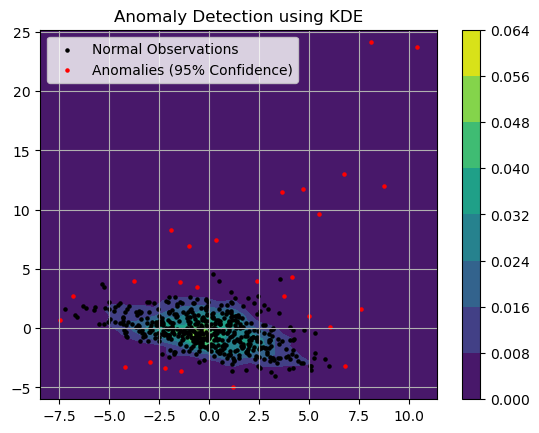

In [56]:
from sklearn.neighbors import KernelDensity

# Generate the KDE surface as Z
kde = KernelDensity(kernel='gaussian',bandwidth=0.4).fit(X)
Zp = np.exp(kde.score_samples(XY))
Zp = Zp.reshape(Xp.shape)

# Establish a confidence level of 95% (or 5% cutoff) 
# for the UCL using the quantile of kde_scores.
scores = kde.score_samples(X)
threshold = np.quantile(scores,0.05)
print(f"Threshold (KDE) = {np.exp(threshold)}")

# Get the anomalous data points
normals = X[scores > threshold,:]
anomals = X[scores <= threshold,:]

cntr = plt.contourf(Xp, Yp, Zp, cmap='viridis')
plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label='Anomalies (95% Confidence)')
plt.title('Anomaly Detection using KDE')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()

## Using OneClassSVM for Anomalies

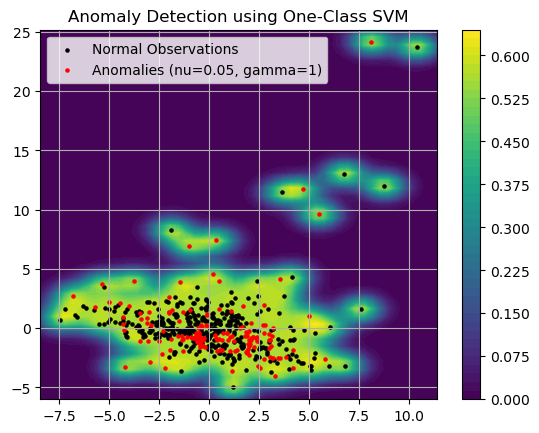

In [83]:
from sklearn.svm import OneClassSVM

ocsvm = OneClassSVM(nu=0.05, gamma=1).fit(X)
Zp = ocsvm.score_samples(XY)
Zp = Zp.reshape(Xp.shape)

# Get the anomalous data points
y_pred = ocsvm.predict(X)
normals = X[y_pred == 1,:]
anomals = X[y_pred == -1,:]

cntr = plt.contourf(Xp, Yp, Zp, levels=50, cmap='viridis')
plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label='Anomalies (nu=0.05, gamma=1)')
plt.title('Anomaly Detection using One-Class SVM')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()

## Using LocalOutlierFactor for Anomalies

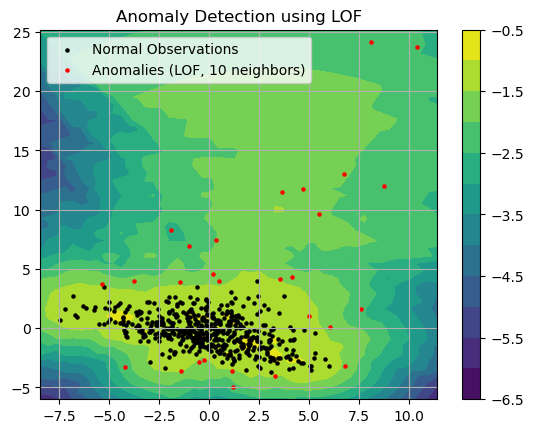

In [86]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=10,novelty=True).fit(X)
Zp = lof.score_samples(XY)
Zp = Zp.reshape(Xp.shape)

# Get the anomalous data points
y_pred = lof.predict(X)
normals = X[y_pred == 1,:]
anomals = X[y_pred == -1,:]

cntr = plt.contourf(Xp, Yp, Zp, levels=10, cmap='viridis')
plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label='Anomalies (LOF, 10 neighbors)')
plt.title('Anomaly Detection using LOF')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()

## Discussion of Results for Part 2

In this part of the activity, different algorithms has been used to detect the anomalies within the data set namely, DBScan, KDE, One-Class SVM, and LOF. Each algorithm obtained different result and giving their own results. Among all of this algorithms, the DBScan treated all the datasets as an anomaly which makes it not suitable for the dataset to be used in terms of anomaly detection. By observation, the results for LOF and KDE shows a good result of showing different anomalies within the data. LOF in the other hand, even after nu and gamma has been adjusted, shows inconsistency within the algorithm since even the data points are already part of a certain cluster, it was treated as anomaly (as per self observation). As this activity was performed, different algorithms can be used in different data but not all algorithms are effective depending on the data that is currently being explored (based in the result of DBScan).